# Goodreads Quotes Dataset Cleaning

This notebook loads and cleans the Goodreads 500k quotes dataset. TODO: Add more explanation.


In [10]:
import pandas as pd
import os

# Define paths to the CSV files
data_dir = 'Data'
quotes_3k_path = os.path.join(data_dir, 'quotes-3k.csv')
quotes_350k_path = os.path.join(data_dir, 'quotes-350k.csv')

# Load the CSV files into pandas DataFrames
df_3k = pd.read_csv(quotes_3k_path)
df_350k = pd.read_csv(quotes_350k_path)

# Display the heads of both DataFrames
print("First 5 rows of quotes-3k.csv:")
display(df_3k.head())

print("\nFirst 5 rows of quotes-350k.csv:")
display(df_350k.head())

# Display the shapes of both DataFrames
print(f"\nShape of quotes-3k.csv: {df_3k.shape}")
print(f"Shape of quotes-350k.csv: {df_350k.shape}")

First 5 rows of quotes-3k.csv:


,index,quote,author,tags,likes
0,0,Be yourself; everyone else is already taken.,Oscar Wilde,attributed-no-source;be-yourself;honesty;inspi...,149270
1,1,You've gotta dance like there's nobody watching,William W. Purkey,dance;heaven;hurt;inspirational;life;love;sing,118888
2,2,Be the change that you wish to see in the world.,Mahatma Gandhi,action;change;inspirational;philosophy;wish,106749
3,3,No one can make you feel inferior without your...,"Eleanor Roosevelt,",confidence;inspirational;wisdom,85854
4,4,Live as if you were to die tomorrow. Learn as ...,Mahatma Gandhi,carpe-diem;education;inspirational;learning,73033



First 5 rows of quotes-350k.csv:


,QUOTE,AUTHOR,TITLE,LIKES,TAGS
0,“My life amounts to no more than one drop in a...,David Mitchell,Cloud Atlas,4589,NaN
1,“A half-read book is a half-finished love affa...,David Mitchell,Cloud Atlas,3181,"['love', 'reading']"
2,“Our lives are not our own. We are bound to ot...,David Mitchell,Cloud Atlas,2534,NaN
3,"“Travel far enough, you meet yourself.”",David Mitchell,Cloud Atlas,1547,['travel']
4,"“Books don't offer real escape, but they can s...",David Mitchell,Cloud Atlas,1490,"['escape', 'reading']"



Shape of quotes-3k.csv: (3001, 5)
Shape of quotes-350k.csv: (348085, 5)


In [11]:
# Standardize column names and reorganize columns
# For df_3k
df_3k.columns = [col.upper() for col in df_3k.columns]
# Add TITLE column if missing
if 'TITLE' not in df_3k.columns:
    df_3k['TITLE'] = None

# Reorder columns for both DataFrames
columns_order = ['QUOTE', 'LIKES', 'AUTHOR', 'TITLE', 'TAGS']

# Reorder df_3k (the smaller dataset)
df_3k = df_3k[columns_order]

# Reorder df_350k (the larger dataset)
df_350k = df_350k[columns_order]

# Display the heads of the reorganized DataFrames
print("First 5 rows of quotes-3k.csv after reorganization:")
display(df_3k.head())

print("\nFirst 5 rows of quotes-350k.csv after reorganization:")
display(df_350k.head())

First 5 rows of quotes-3k.csv after reorganization:


,QUOTE,LIKES,AUTHOR,TITLE,TAGS
0,Be yourself; everyone else is already taken.,149270,Oscar Wilde,None,attributed-no-source;be-yourself;honesty;inspi...
1,You've gotta dance like there's nobody watching,118888,William W. Purkey,None,dance;heaven;hurt;inspirational;life;love;sing
2,Be the change that you wish to see in the world.,106749,Mahatma Gandhi,None,action;change;inspirational;philosophy;wish
3,No one can make you feel inferior without your...,85854,"Eleanor Roosevelt,",None,confidence;inspirational;wisdom
4,Live as if you were to die tomorrow. Learn as ...,73033,Mahatma Gandhi,None,carpe-diem;education;inspirational;learning



First 5 rows of quotes-350k.csv after reorganization:


,QUOTE,LIKES,AUTHOR,TITLE,TAGS
0,“My life amounts to no more than one drop in a...,4589,David Mitchell,Cloud Atlas,NaN
1,“A half-read book is a half-finished love affa...,3181,David Mitchell,Cloud Atlas,"['love', 'reading']"
2,“Our lives are not our own. We are bound to ot...,2534,David Mitchell,Cloud Atlas,NaN
3,"“Travel far enough, you meet yourself.”",1547,David Mitchell,Cloud Atlas,['travel']
4,"“Books don't offer real escape, but they can s...",1490,David Mitchell,Cloud Atlas,"['escape', 'reading']"


In [12]:
def comprehensive_quote_cleaning(df):
    # Make a copy to avoid modifying the original DataFrame
    df_cleaned = df.copy()
    
    # Unicode quotes and formatting characters to handle
    left_quote = '\u201c'   # Unicode left double quote (")
    right_quote = '\u201d'  # Unicode right double quote (")
    em_dash = '\u2015'      # Unicode em dash (―)
    
    def clean_quote(text):
        if not isinstance(text, str):
            return text
        
        # Keep cleaning until no more changes are made
        previous_text = None
        current_text = text.strip()
        
        while previous_text != current_text:
            previous_text = current_text
            
            # Remove balanced outer quotes
            if (current_text.startswith(left_quote) and current_text.endswith(right_quote)):
                current_text = current_text[1:-1].strip()
            
            # Remove trailing em dash and whitespace
            current_text = current_text.rstrip(' \t\r\n' + em_dash)
            
            # Remove any ASCII quote pairs too
            if (current_text.startswith('"') and current_text.endswith('"')):
                current_text = current_text[1:-1].strip()
        
        return current_text
    
    # Apply cleaning function
    df_cleaned['QUOTE'] = df_cleaned['QUOTE'].apply(clean_quote)
    
    return df_cleaned

# Clean the quotes
df_350k_cleaned = comprehensive_quote_cleaning(df_350k)

# Check a few examples to verify the cleaning worked
print("Examples of cleaned quotes:")
for i in range(5):
    original = df_350k['QUOTE'].iloc[i]
    cleaned = df_350k_cleaned['QUOTE'].iloc[i]
    print(f"\nOriginal quote {i+1}: {original}")
    print(f"Cleaned quote {i+1}: {cleaned}")

# Analyze the distribution of quote patterns after cleaning
def analyze_quote_patterns_after_cleaning(df):
    # Count quotes that still have quotation marks
    with_quotes = 0
    without_quotes = 0
    
    for quote in df['QUOTE']:
        if not isinstance(quote, str):
            continue
            
        # Check if the quote still has any quote characters
        if ('"' in quote) or ('"' in quote) or ('"' in quote):
            with_quotes += 1
        else:
            without_quotes += 1
    
    print(f"\nAfter cleaning:")
    print(f"Quotes still containing quotation marks: {with_quotes}")
    print(f"Quotes with all quotation marks removed: {without_quotes}")

# Run analysis
analyze_quote_patterns_after_cleaning(df_350k_cleaned)

Examples of cleaned quotes:

Original quote 1: “My life amounts to no more than one drop in a limitless ocean. Yet what is any ocean, but a multitude of drops?”  
  ―
Cleaned quote 1: My life amounts to no more than one drop in a limitless ocean. Yet what is any ocean, but a multitude of drops?

Original quote 2: “A half-read book is a half-finished love affair.”
Cleaned quote 2: A half-read book is a half-finished love affair.

Original quote 3: “Our lives are not our own. We are bound to others, past and present, and by each crime and every kindness, we birth our future.”
Cleaned quote 3: Our lives are not our own. We are bound to others, past and present, and by each crime and every kindness, we birth our future.

Original quote 4: “Travel far enough, you meet yourself.”
Cleaned quote 4: Travel far enough, you meet yourself.

Original quote 5: “Books don't offer real escape, but they can stop a mind scratching itself raw.”
Cleaned quote 5: Books don't offer real escape, but they can

In [13]:
# Code Cell 4: Clean whitespace issues in the 3k dataset

# Create a copy of the dataframe for cleaning
df_3k_cleaned = df_3k.copy()

# Whitespace cleaning function
def clean_whitespace(text):
    if not isinstance(text, str):
        return text
    
    # Strip leading and trailing whitespace
    cleaned_text = text.strip()
    
    # Replace multiple consecutive spaces with a single space
    while '  ' in cleaned_text:
        cleaned_text = cleaned_text.replace('  ', ' ')
    
    # Remove tabs, newlines, and carriage returns
    cleaned_text = cleaned_text.replace('\t', ' ').replace('\n', ' ').replace('\r', ' ')
    
    # After replacement, perform another strip to handle any new leading/trailing whitespace
    cleaned_text = cleaned_text.strip()
    
    return cleaned_text

# Track changes for reporting
total_quotes = 0
modified_quotes = 0
examples = []

# Apply cleaning to each quote
for idx, quote in enumerate(df_3k['QUOTE']):
    if not isinstance(quote, str):
        continue
    
    total_quotes += 1
    cleaned_quote = clean_whitespace(quote)
    
    # Record if the quote was changed
    if quote != cleaned_quote:
        modified_quotes += 1
        
        # Save some examples for display
        if len(examples) < 5:
            examples.append((quote, cleaned_quote))
    
    # Update the cleaned dataframe
    df_3k_cleaned.at[idx, 'QUOTE'] = cleaned_quote

# Print summary of cleaning
print(f"Whitespace Cleaning Summary:")
print(f"Total quotes processed: {total_quotes}")
print(f"Quotes modified: {modified_quotes} ({modified_quotes/total_quotes*100:.2f}%)")

# Display examples of cleaned quotes
print("\nExamples of cleaned quotes:")
for i, (original, cleaned) in enumerate(examples):
    print(f"\nExample {i+1}:")
    print(f"Original: '{original}'")
    print(f"Cleaned:  '{cleaned}'")

# Check if there are any remaining whitespace issues
remaining_issues = 0
for quote in df_3k_cleaned['QUOTE']:
    if not isinstance(quote, str):
        continue
    if quote != quote.strip() or '  ' in quote or '\t' in quote or '\n' in quote or '\r' in quote:
        remaining_issues += 1

print(f"\nRemaining quotes with whitespace issues: {remaining_issues}")

Whitespace Cleaning Summary:
Total quotes processed: 2996
Quotes modified: 40 (1.34%)

Examples of cleaned quotes:

Example 1:
Original: 'Others have seen what is and asked why. I have seen what could be and asked why not. '
Cleaned:  'Others have seen what is and asked why. I have seen what could be and asked why not.'

Example 2:
Original: 'Two roads diverged in a wood, and I '
Cleaned:  'Two roads diverged in a wood, and I'

Example 3:
Original: 'Because paper has more patience than people. '
Cleaned:  'Because paper has more patience than people.'

Example 4:
Original: '???? ???? ??????...???? ??...???? ????..???? ??????...???? ?????...???? ???? ???? ?????? ????..?? ????? ?? ??? ??? ????? ?? ???? ??? ????? ???? ??????? '
Cleaned:  '???? ???? ??????...???? ??...???? ????..???? ??????...???? ?????...???? ???? ???? ?????? ????..?? ????? ?? ??? ??? ????? ?? ???? ??? ????? ???? ???????'

Example 5:
Original: 'I've come to believe that each of us has a personal calling that's as unique a

In [14]:
# Code Cell 5: Unify datasets and create quotes-unified.csv

# Concatenate the two cleaned dataframes
df_unified = pd.concat([df_3k_cleaned, df_350k_cleaned], ignore_index=True)
total_initial = len(df_unified)

# Remove rows with empty QUOTE values (NaN, None, empty strings, or whitespace-only)
df_unified = df_unified.dropna(subset=['QUOTE'])  # Remove NaN values
# Remove empty strings or whitespace-only quotes
df_unified = df_unified[df_unified['QUOTE'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)]
quotes_filtered = len(df_unified)

# Remove rows with empty AUTHOR or TITLE values
author_title_before = len(df_unified)
df_unified = df_unified.dropna(subset=['AUTHOR', 'TITLE'], how='any')  # Remove rows where either column is NaN
# Remove rows with empty strings or whitespace-only in AUTHOR or TITLE
df_unified = df_unified[df_unified['AUTHOR'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)]
df_unified = df_unified[df_unified['TITLE'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)]
author_title_after = len(df_unified)
author_title_removed = author_title_before - author_title_after

# Before deduplication, sort the dataframe so that quotes with titles come first
# Create a temporary column to indicate whether a title exists
df_unified['has_title'] = df_unified['TITLE'].notna()

# Sort by has_title (True values first) to prioritize quotes with titles
df_unified = df_unified.sort_values('has_title', ascending=False)

# Drop duplicates, keeping the first occurrence (which will now be the one with a title if available)
df_unified_deduped = df_unified.drop_duplicates(subset=['QUOTE'], keep='first')
deduped_count = len(df_unified_deduped)

# Remove the temporary has_title column
df_unified_deduped = df_unified_deduped.drop(columns=['has_title'])

# Compare size before and after processing
print(f"Total rows in combined datasets: {total_initial}")
print(f"Rows after removing empty quotes: {quotes_filtered} (Removed {total_initial - quotes_filtered} rows)")
print(f"Rows after removing empty author/title values: {author_title_after} (Removed {author_title_removed} rows)")
print(f"Total rows after deduplication: {deduped_count}")
print(f"Removed {total_initial - deduped_count} rows total")

# Reset index for clean sequential indexing
df_unified_deduped = df_unified_deduped.reset_index(drop=True)

# Save the unified dataset to CSV
output_path = os.path.join(data_dir, 'quotes-unified.csv')
df_unified_deduped.to_csv(output_path, index=False)
print(f"\nUnified dataset saved to: {output_path}")

# Display the first 20 rows of the unified dataset
print("\nFirst 20 rows of the unified dataset:")
display(df_unified_deduped.head(20))

# Get some basic statistics about the unified dataset
print(f"\nUnified Dataset Statistics:")
print(f"Total quotes: {len(df_unified_deduped)}")
print(f"Quotes with titles: {df_unified_deduped['TITLE'].notna().sum()}")
print(f"Number of unique authors: {df_unified_deduped['AUTHOR'].nunique()}")
print(f"Average quote likes: {df_unified_deduped['LIKES'].mean():.2f}")

Total rows in combined datasets: 351086
Rows after removing empty quotes: 351075 (Removed 11 rows)
Rows after removing empty author/title values: 343598 (Removed 7477 rows)
Total rows after deduplication: 342054
Removed 9032 rows total

Unified dataset saved to: Data/quotes-unified.csv

First 20 rows of the unified dataset:


,QUOTE,LIKES,AUTHOR,TITLE,TAGS
0,My life amounts to no more than one drop in a ...,4589,David Mitchell,Cloud Atlas,NaN
1,G. K. Chesterton once said that to be thankful...,2,Ravi Zacharias,Recapture the Wonder: Experiencing God's Amazi...,NaN
2,"Contrary to popular belief, fantasy is not abo...",2,Terry Pratchett,A Slip of the Keyboard: Collected Non-fiction,NaN
3,"There is a limit to human charity,"" said Lady ...",2,G.K. Chesterton,The Penguin Complete Father Brown,"['crime', 'forgiveness']"
4,"And the greatest of the poets, when he defined...",2,G.K. Chesterton,The Everlasting Man,NaN
5,Only a man who knows nothing of motors talks o...,2,G.K. Chesterton,The Innocence of Father Brown,NaN
6,Nature is not our mother: Nature is our sister...,2,G.K. Chesterton,Orthodoxy,NaN
7,I have never been to St. John's Wood. I dare n...,2,G.K. Chesterton,The Napoleon of Notting Hill,NaN
8,The globe-trotter lives in a smaller world tha...,2,G.K. Chesterton,Heretics,['traveling']
9,In so far as I am Man I am the chief of creatu...,2,G.K. Chesterton,The Works of G. K. Chesterson,NaN



Unified Dataset Statistics:
Total quotes: 342054
Quotes with titles: 342054
Number of unique authors: 7667
Average quote likes: 50.86


In [17]:
# Code Cell 6: Filter quotes by popularity and generate statistics

# Create a filtered dataset with quotes that have at least 1 likes
df_popular_quotes = df_unified_deduped[df_unified_deduped['LIKES'] >= 1].copy()

# Reset index for clean sequential indexing
df_popular_quotes = df_popular_quotes.reset_index(drop=True)

# Print basic comparison between original and filtered datasets
print(f"Original dataset size: {len(df_unified_deduped)} quotes")
print(f"Filtered dataset size (≥1 likes): {len(df_popular_quotes)} quotes")
print(f"Removed {len(df_unified_deduped) - len(df_popular_quotes)} quotes with <1 likes")
print(f"Retained {len(df_popular_quotes)/len(df_unified_deduped)*100:.2f}% of original dataset")

# Save the popular quotes to a new CSV file
popular_quotes_path = os.path.join(data_dir, 'quotes-popular.csv')
df_popular_quotes.to_csv(popular_quotes_path, index=False)
print(f"\nPopular quotes saved to: {popular_quotes_path}")

# Generate detailed statistics
print("\nDetailed Statistics for Popular Quotes:")
print(f"Minimum likes: {df_popular_quotes['LIKES'].min()}")
print(f"Maximum likes: {df_popular_quotes['LIKES'].max()}")
print(f"Average likes: {df_popular_quotes['LIKES'].mean():.2f}")
print(f"Median likes: {df_popular_quotes['LIKES'].median():.2f}")

# Author statistics
top_authors = df_popular_quotes['AUTHOR'].value_counts().head(10)
print(f"\nTop 10 Authors by Number of Popular Quotes:")
for author, count in top_authors.items():
    print(f"{author}: {count} quotes")

# Title presence
has_title = df_popular_quotes['TITLE'].notna().sum()
print(f"\nQuotes with book titles: {has_title} ({has_title/len(df_popular_quotes)*100:.2f}%)")

# Tag statistics (if tags column is present and not all NaN)
if 'TAGS' in df_popular_quotes.columns and not df_popular_quotes['TAGS'].isna().all():
    # Count non-null tag entries
    tags_present = df_popular_quotes['TAGS'].notna().sum()
    print(f"\nQuotes with tags: {tags_present} ({tags_present/len(df_popular_quotes)*100:.2f}%)")
    
    # If tags are in a list or string format that can be parsed, analyze most common tags
    # This assumes tags are stored as strings separated by some delimiter
    if df_popular_quotes['TAGS'].dtype == 'object':
        # Sample approach for semicolon-separated tags as in the 3k dataset
        all_tags = []
        for tags in df_popular_quotes['TAGS'].dropna():
            if isinstance(tags, str):
                # Try to handle different tag formats (list strings, semicolon-separated, etc.)
                if tags.startswith('[') and tags.endswith(']'):
                    # Handle list-like strings: "['tag1', 'tag2']"
                    tag_list = tags.strip('[]').replace("'", "").replace('"', '').split(',')
                    all_tags.extend([t.strip() for t in tag_list if t.strip()])
                else:
                    # Handle semicolon-separated tags
                    tag_list = tags.split(';')
                    all_tags.extend([t.strip() for t in tag_list if t.strip()])
        
        # Count and display most common tags if we found any
        if all_tags:
            from collections import Counter
            top_tags = Counter(all_tags).most_common(10)
            print(f"\nTop 10 Tags in Popular Quotes:")
            for tag, count in top_tags:
                print(f"{tag}: {count} occurrences")

# Quote length statistics
df_popular_quotes['QUOTE_LENGTH'] = df_popular_quotes['QUOTE'].apply(lambda x: len(x) if isinstance(x, str) else 0)
print(f"\nQuote Length Statistics:")
print(f"Average length: {df_popular_quotes['QUOTE_LENGTH'].mean():.2f} characters")
print(f"Shortest quote: {df_popular_quotes['QUOTE_LENGTH'].min()} characters")
print(f"Longest quote: {df_popular_quotes['QUOTE_LENGTH'].max()} characters")

# Display a sample of 5 popular quotes
print(f"\nSample of Popular Quotes:")
sample_quotes = df_popular_quotes.sample(min(5, len(df_popular_quotes)))
for i, (_, row) in enumerate(sample_quotes.iterrows()):
    print(f"{i+1}. \"{row['QUOTE']}\" - {row['AUTHOR']} ({row['LIKES']} likes)")

Original dataset size: 342054 quotes
Filtered dataset size (≥1 likes): 239949 quotes
Removed 102105 quotes with <1 likes
Retained 70.15% of original dataset

Popular quotes saved to: Data/quotes-popular.csv

Detailed Statistics for Popular Quotes:
Minimum likes: 1
Maximum likes: 95186
Average likes: 72.50
Median likes: 6.00

Top 10 Authors by Number of Popular Quotes:
Sarah J. Maas: 1886 quotes
Sherrilyn Kenyon: 1828 quotes
Chuck Palahniuk: 1820 quotes
Rick Riordan: 1819 quotes
Terry Pratchett: 1817 quotes
George R.R. Martin: 1751 quotes
Jodi Picoult: 1745 quotes
Fyodor Dostoyevsky: 1720 quotes
Ilona Andrews: 1685 quotes
Jim Butcher: 1685 quotes

Quotes with book titles: 239949 (100.00%)

Quotes with tags: 84472 (35.20%)

Top 10 Tags in Popular Quotes:
love: 4090 occurrences
life: 2819 occurrences
humor: 2675 occurrences
inspirational: 1096 occurrences
religion: 962 occurrences
romance: 960 occurrences
truth: 937 occurrences
writing: 930 occurrences
philosophy: 766 occurrences
women: 7

Original popular quotes dataset size: 239949 quotes
Detecting languages in popular quotes dataset...


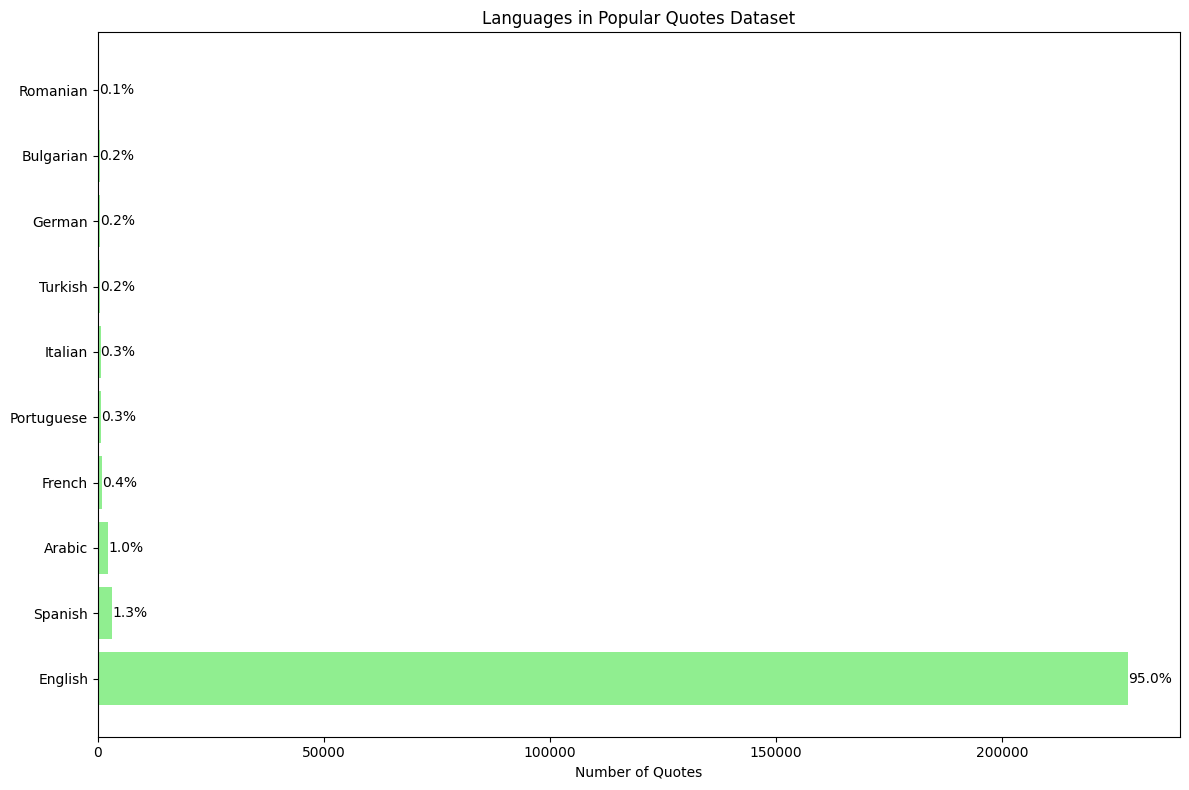


Language Distribution in Popular Quotes:
English: 227900 quotes (94.98%)
Spanish: 3208 quotes (1.34%)
Arabic: 2309 quotes (0.96%)
French: 853 quotes (0.36%)
Portuguese: 683 quotes (0.28%)
Italian: 604 quotes (0.25%)
Turkish: 537 quotes (0.22%)
German: 455 quotes (0.19%)
Bulgarian: 375 quotes (0.16%)
Romanian: 311 quotes (0.13%)

Removed 12049 non-English quotes (5.02%)
Remaining English quotes: 227900

Saved English-only popular quotes to: Data/goodreads-english-popular-quotes.csv


In [19]:
# Code Cell 7: Analyze languages of popular quotes and filter to English-only

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect, LangDetectException
from collections import Counter
import numpy as np

# Load only the popular quotes dataset
data_dir = 'Data'
popular_path = os.path.join(data_dir, 'quotes-popular.csv')
df_popular = pd.read_csv(popular_path)

print(f"Original popular quotes dataset size: {len(df_popular)} quotes")

# Language detection function with error handling
def detect_language(text):
    if not isinstance(text, str) or len(text.strip()) < 4:
        return 'unknown'  # Too short to reliably detect
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Detect languages for all quotes
print("Detecting languages in popular quotes dataset...")
df_popular['language'] = df_popular['QUOTE'].apply(detect_language)

# Count quotes by language before filtering
lang_counts = Counter(df_popular['language'])

# Get language name mapping
language_names = {
    'en': 'English', 'es': 'Spanish', 'fr': 'French', 'de': 'German', 
    'it': 'Italian', 'pt': 'Portuguese', 'nl': 'Dutch', 'ru': 'Russian',
    'ar': 'Arabic', 'ja': 'Japanese', 'ko': 'Korean', 'zh-cn': 'Chinese',
    'unknown': 'Unknown/Too Short', 'la': 'Latin', 'el': 'Greek',
    'no': 'Norwegian', 'sv': 'Swedish', 'fi': 'Finnish', 'da': 'Danish',
    'cs': 'Czech', 'pl': 'Polish', 'hu': 'Hungarian', 'tr': 'Turkish',
    'ro': 'Romanian', 'fa': 'Persian', 'hi': 'Hindi', 'th': 'Thai',
    'bg': 'Bulgarian', 'ca': 'Catalan', 'hr': 'Croatian', 'vi': 'Vietnamese'
}

# Function to format language data for display
def format_language_data(lang_counter, total_samples):
    top_langs = lang_counter.most_common(10)
    formatted_data = []
    
    for lang_code, count in top_langs:
        lang_name = language_names.get(lang_code, lang_code)
        percentage = (count / total_samples) * 100
        formatted_data.append((lang_name, count, percentage))
    
    return formatted_data

# Visualize language distribution before filtering
plt.figure(figsize=(12, 8))
formatted_data = format_language_data(lang_counts, len(df_popular))
langs = [lang for lang, _, _ in formatted_data]
counts = [count for _, count, _ in formatted_data]
pcts = [pct for _, _, pct in formatted_data]

plt.barh(langs, counts, color='lightgreen')
plt.title('Languages in Popular Quotes Dataset')
plt.xlabel('Number of Quotes')

# Add percentage labels
for i, v in enumerate(counts):
    plt.text(v + 5, i, f"{pcts[i]:.1f}%", va='center')

plt.tight_layout()
plt.show()

# Print language distribution
print("\nLanguage Distribution in Popular Quotes:")
for lang, count, percentage in formatted_data:
    print(f"{lang}: {count} quotes ({percentage:.2f}%)")

# Filter to keep only English quotes
english_quotes = df_popular[df_popular['language'] == 'en'].copy()

# Count removed quotes
non_english_count = len(df_popular) - len(english_quotes)
print(f"\nRemoved {non_english_count} non-English quotes ({non_english_count/len(df_popular)*100:.2f}%)")
print(f"Remaining English quotes: {len(english_quotes)}")

# Remove the language column before saving
english_quotes = english_quotes.drop(columns=['language'])

# Save the filtered dataset
output_path = os.path.join(data_dir, 'goodreads-english-popular-quotes.csv')
english_quotes.to_csv(output_path, index=False)
print(f"\nSaved English-only popular quotes to: {output_path}")

In [20]:
# Code Cell: Standardize tag format in the quotes dataset

import pandas as pd
import os
import ast
import numpy as np
import re

# Load the English popular quotes dataset
data_dir = 'Data'
quotes_path = os.path.join(data_dir, 'goodreads-english-popular-quotes.csv')
df_quotes = pd.read_csv(quotes_path)

print(f"Loaded {len(df_quotes)} English popular quotes")

# Function to standardize tag format
def standardize_tags(tag_value):
    # If NaN, return empty list as string
    if pd.isna(tag_value):
        return '[]'
    
    # If already in list format (starts with '[' and ends with ']')
    if isinstance(tag_value, str) and tag_value.strip().startswith('[') and tag_value.strip().endswith(']'):
        try:
            # Verify it's a valid list by parsing it
            parsed = ast.literal_eval(tag_value)
            if isinstance(parsed, list):
                return tag_value  # Already in correct format
        except (ValueError, SyntaxError):
            # If parsing fails, we'll handle it as a string
            pass
    
    # If semicolon-separated format
    if isinstance(tag_value, str) and ';' in tag_value:
        tags = [tag.strip() for tag in tag_value.split(';') if tag.strip()]
        return str(tags)
    
    # Other string formats (single tag or comma-separated)
    if isinstance(tag_value, str):
        # Check if it's comma-separated without proper list formatting
        if ',' in tag_value and not (tag_value.strip().startswith('[') and tag_value.strip().endswith(']')):
            tags = [tag.strip() for tag in tag_value.split(',') if tag.strip()]
            return str(tags)
        # Single tag
        return f"['{tag_value.strip()}']"
    
    # Default case (shouldn't reach here)
    return '[]'

# Before counts
original_tag_formats = {
    "NaN values": df_quotes['TAGS'].isna().sum(),
    "List format": df_quotes['TAGS'].apply(lambda x: isinstance(x, str) and x.strip().startswith('[') and x.strip().endswith(']')).sum(),
    "Semicolon format": df_quotes['TAGS'].apply(lambda x: isinstance(x, str) and ';' in x).sum(),
    "Other formats": len(df_quotes) - df_quotes['TAGS'].isna().sum() - 
                    df_quotes['TAGS'].apply(lambda x: isinstance(x, str) and x.strip().startswith('[') and x.strip().endswith(']')).sum() -
                    df_quotes['TAGS'].apply(lambda x: isinstance(x, str) and ';' in x).sum()
}

print("\nOriginal tag formats:")
for format_type, count in original_tag_formats.items():
    print(f"{format_type}: {count} ({count/len(df_quotes)*100:.2f}%)")

# Show examples before standardization
print("\nExamples of original tag formats:")
for i, format_type in enumerate(["List format", "Semicolon format", "Other formats", "NaN values"]):
    if format_type == "List format":
        example = df_quotes[df_quotes['TAGS'].apply(lambda x: isinstance(x, str) and x.strip().startswith('[') and x.strip().endswith(']'))].iloc[0]['TAGS'] if any(df_quotes['TAGS'].apply(lambda x: isinstance(x, str) and x.strip().startswith('[') and x.strip().endswith(']'))) else "No example"
    elif format_type == "Semicolon format":
        example = df_quotes[df_quotes['TAGS'].apply(lambda x: isinstance(x, str) and ';' in x)].iloc[0]['TAGS'] if any(df_quotes['TAGS'].apply(lambda x: isinstance(x, str) and ';' in x)) else "No example"
    elif format_type == "Other formats":
        mask = ~df_quotes['TAGS'].isna() & ~df_quotes['TAGS'].apply(lambda x: isinstance(x, str) and x.strip().startswith('[') and x.strip().endswith(']')) & ~df_quotes['TAGS'].apply(lambda x: isinstance(x, str) and ';' in x)
        example = df_quotes[mask].iloc[0]['TAGS'] if any(mask) else "No example"
    else:  # NaN values
        example = "NaN"
    
    print(f"{i+1}. {format_type}: {example}")

# Apply standardization
df_quotes['TAGS'] = df_quotes['TAGS'].apply(standardize_tags)

# After counts - all should now be in list format
standardized_formats = {
    "List format": df_quotes['TAGS'].apply(lambda x: x.strip().startswith('[') and x.strip().endswith(']')).sum(),
    "Non-list format": len(df_quotes) - df_quotes['TAGS'].apply(lambda x: x.strip().startswith('[') and x.strip().endswith(']')).sum()
}

print("\nAfter standardization:")
for format_type, count in standardized_formats.items():
    print(f"{format_type}: {count} ({count/len(df_quotes)*100:.2f}%)")

# Show examples after standardization
print("\nExamples after standardization:")
for i in range(5):
    if i < len(df_quotes):
        print(f"{i+1}. {df_quotes['TAGS'].iloc[i]}")

# Save the standardized dataset
output_path = os.path.join(data_dir, 'tags-goodreads-english-popular-quotes.csv')
df_quotes.to_csv(output_path, index=False)
print(f"\nSaved standardized quotes to: {output_path}")

# Bonus: analyze tag frequencies
def extract_tags_from_list_string(tag_string):
    try:
        # Convert string representation of list to actual list
        if tag_string == '[]':
            return []
        tag_list = ast.literal_eval(tag_string)
        return [tag.lower() for tag in tag_list if tag]  # Convert to lowercase for consistency
    except (ValueError, SyntaxError):
        return []

# Extract and count all tags
all_tags = []
for tags_str in df_quotes['TAGS']:
    all_tags.extend(extract_tags_from_list_string(tags_str))

from collections import Counter
tag_counts = Counter(all_tags)

print("\nTop 20 most common tags:")
for tag, count in tag_counts.most_common(20):
    print(f"{tag}: {count} occurrences")

Loaded 227900 English popular quotes

Original tag formats:
NaN values: 147026 (64.51%)
List format: 80874 (35.49%)
Semicolon format: 0 (0.00%)
Other formats: 0 (0.00%)

Examples of original tag formats:
1. List format: ['crime', 'forgiveness']
2. Semicolon format: No example
3. Other formats: No example
4. NaN values: NaN

After standardization:
List format: 227900 (100.00%)
Non-list format: 0 (0.00%)

Examples after standardization:
1. []
2. []
3. []
4. ['crime', 'forgiveness']
5. []

Saved standardized quotes to: Data/tags-goodreads-english-popular-quotes.csv

Top 20 most common tags:
love: 3939 occurrences
life: 2752 occurrences
humor: 2637 occurrences
inspirational: 1057 occurrences
romance: 948 occurrences
truth: 922 occurrences
writing: 917 occurrences
religion: 895 occurrences
women: 694 occurrences
philosophy: 693 occurrences
god: 659 occurrences
war: 649 occurrences
reading: 630 occurrences
science: 623 occurrences
death: 623 occurrences
funny: 563 occurrences
time: 546 occur